Q1. Your views about the problem statement?

The editor-in-chief of The Daily Buzz seeks to enhance weather forecasting by employing a machine learning expert to develop a rainfall prediction model. sing techniques like decision tree classifiers and ensemble methods, historical weather data analysis can generate precise rainfall predictionss by considering factors like temperature, humidity, wind speed, and pressure.

Q2 What will be your approach to solving this task?

1. coverting categorical data in numericals through dummies and other means
2. Checking for outliers and missing values through graphs and descriptive stats.
3. Fixing them
4. Making a correlation chart to check multi collinearity
5. Doing test train split
5. Implementing different classification models and train them through training data
6. Checking and comparing their accuracy through accuracy score and confusion matrix

Q3. What were the available ML model options you had to perform this task?

1. Logisitc Reression - 0.831
2. Linear Discriminant Analysis-0.833
3. K Nearest Neighbor -0.72
4. K Nearest Neighor With best Neighbor estimator- 0.817
5. Decision tree classification- 0.804
6. Random Forest classifier -839
7. Gradient boost-0.844
8. XG Boost - 0.845
9. XG Boost (with different Parameters)- 0.839

Q4. Which model’s performance is best and what could be the possible reason for that?

XG boost has given the best result with an accuracy of 0.845 highest of all

1. Complexity Handling: XGBoost is great at understanding complicated relationships in the data. This is super helpful for weather predictions where many factors interact.

2. Ensemble Methods: XG boostsis an ensemble methoder. It combines the guesses of many smaller models (like decision trees) to make one big accurate prediction. Thrk often leads to better results than just using one mode

3. l.Built to Performcear. It's built to be fast and efficient, using smart techniques to mlly accurate predictioIhy it often beats other methods like logistic regression, LDA, KNN, and regular decision trees.



Q5. What steps can you take to improve this selected model’s performance even further?

1. Gathering more data. Gather data more data, if feasible, will enhances models ability to generalize

2. Feature Engineering: Explore and engineer new features from existing data that might provide additional insights.

3. Early stopping: Implementing early stopping to prevent overfitting. Stopping training when the accuracy of the model starts to decline

In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
#importing data
df =pd.read_csv("C:/Users/hp/OneDrive/Documents/sydney_rain prediction.csv",header=0)

In [3]:
#the data
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-02-2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  02-02-2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  03-02-2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  04-02-2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  05-02-2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [4]:
#Descriptive data to find outliers, Rainfall found as a outlier
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3334.000000  3335.000000  3331.000000  3286.000000  3321.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.553641     4.494638     9.895172     2.777407     3.810886   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.300000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3323.000000  3324.000000  3317.000000  3318.000000  2771.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.085355    16.293530     7.021571     7.032211     2.749578   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.700000  1011.300000     1.000000   
50%      69.000000    56.000000  1018.600000  1016.300000     5.000000   
75%      80.000000    65.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  
count  2776.000000  3333.000000  3333.000000  
mean      4.218660    17.819742    21.533333  
std       2.641885     4.897177     4.303737  
min       0.000000     6.400000    10.200000  
25%       1.000000    13.800000    18.400000  
50%       4.000000    18.200000    21.300000  
75%       7.000000    21.700000    24.500000  
max       8.000000    36.500000    44.700000

In [5]:
#deleted useless data 
del df["Date"]
del df["Location"]

In [6]:
#creating dummies for role and dropping other Variable to avoid redundancy
df =pd.get_dummies(df, dtype = "int", drop_first= "true")

In [7]:
#data info get the count of data point in each variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3334 non-null   float64
 1   MaxTemp           3335 non-null   float64
 2   Rainfall          3331 non-null   float64
 3   Evaporation       3286 non-null   float64
 4   Sunshine          3321 non-null   float64
 5   Humidity9am       3323 non-null   float64
 6   Humidity3pm       3324 non-null   float64
 7   Pressure9am       3317 non-null   float64
 8   Pressure3pm       3318 non-null   float64
 9   Cloud9am          2771 non-null   float64
 10  Cloud3pm          2776 non-null   float64
 11  Temp9am           3333 non-null   float64
 12  Temp3pm           3333 non-null   float64
 13  RainToday_Yes     3337 non-null   int32  
 14  RainTomorrow_Yes  3337 non-null   int32  
dtypes: float64(13), int32(2)
memory usage: 365.1 KB


In [8]:
#Imputing values through various methods
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(),inplace = True)
df['Cloud9am'].fillna(method='ffill', inplace=True) #done by forward fill to keep the consistency over time 
df['Cloud3pm'].fillna(method='ffill', inplace=True)
df['Temp3pm'].fillna(method='bfill', inplace=True)#done by backward fill to keep the consistency over time 
df['Temp9am'].fillna(method='bfill', inplace=True)
df['Humidity9am'].fillna(method='ffill', inplace=True)
df['Humidity3pm'].fillna(method='ffill', inplace=True)
df['Pressure9am'].fillna(method='bfill', inplace=True)
df['Pressure3pm'].fillna(method='bfill', inplace=True)
df['RainToday_Yes'].fillna(df['RainToday_Yes'].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_78316\1669323774.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cloud9am'].fillna(method='ffill', inplace=True) #done by forward fill to keep the consistency over time
C:\Users\hp\AppData\Local\Temp\ipykernel_78316\1669323774.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Cloud3pm'].fillna(method='ffill', inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_78316\1669323774.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temp3pm'].fillna(method='bfill', inplace=True)#done by backward fill to keep the consistency over time
C:\Users\hp\AppData\Local\Temp\ipykernel_78316\1669323774.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise

In [9]:

uv =np.percentile(df.Rainfall,[99])[0]

In [10]:
df[(df.Rainfall>uv)]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
4        19.7     25.7      77.4     5.187432  0.000000         88.0   
218      11.8     14.2      62.2     5.187432  0.000000         92.0   
633      14.4     17.0      73.2     5.187432  0.000000         91.0   
737      20.2     25.0      77.4     7.400000  0.200000         95.0   
743      21.4     25.5      70.0     9.400000  0.300000         92.0   
855      12.5     20.5      61.4     1.000000  4.400000         80.0   
1140     18.8     23.5      99.4     5.187432  3.300000         92.0   
1182     13.9     19.9      65.2     5.187432  0.700000         81.0   
1232      8.7     18.5      76.8     5.187432  1.600000         91.0   
1234     11.3     13.9      88.2     5.187432  0.000000         88.0   
1235      8.7     15.6      57.4     5.600000  2.700000         89.0   
1464     15.0     21.2     109.4     5.187432  2.300000         96.0   
1506     17.5     23.8      56.0     5.187432  3.300000         92.0   
1559      9.9     16.1      76.4     4.200000  0.000000         96.0   
1760     19.3     26.2      95.2     5.187432  4.500000         93.0   
1797     15.7     20.9      61.4     5.000000  0.400000         93.0   
1877      7.6     13.9      56.2     0.400000  0.200000         93.0   
1878      9.6     13.8      53.4     0.200000  0.100000         91.0   
2355     10.6     16.0      70.8     5.187432  0.100000         79.0   
2457     17.3     20.5      57.0     7.200000  2.300000         95.0   
2540     14.5     17.7     119.4     5.187432  0.000000         87.0   
2541     14.1     17.9     105.8     5.187432  0.600000         98.0   
2599      9.6     14.5      67.0     5.187432  2.500000         98.0   
2666     12.5     19.9      54.4     5.000000  4.400000         66.0   
2875     15.4     21.2      61.2     5.800000  2.700000         91.0   
2889     18.7     23.5      94.4     3.400000  0.800000         91.0   
2950     13.3     21.1      64.4     5.187432  0.000000         91.0   
2951     16.3     19.7      93.8     5.187432  0.000000         89.0   
2952     13.7     18.4      68.4    12.600000  2.200000         59.0   
3011     10.8     18.1      61.0     9.400000  7.179374         90.0   
3032      9.0     17.3      52.8     5.200000  6.700000         67.0   
3199     20.7     27.0      85.0     3.400000  5.900000         79.0   
3318      8.8     15.5      54.6     2.600000  0.000000         82.0   
3319     12.4     18.1      61.0     1.800000  1.300000         91.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
4            74.0       1008.3       1004.8       8.0       8.0     22.5   
218          88.0       1014.8       1013.1       8.0       8.0     13.0   
633          60.0       1023.7       1025.3       8.0       8.0     14.7   
737          86.0       1021.6       1020.8       7.0       8.0     21.1   
743          80.0       1011.9       1010.2       8.0       8.0     22.1   
855          67.0       1014.2       1012.0       5.0       7.0     13.5   
1140         81.0       1012.4       1010.1       6.0       5.0     19.4   
1182         62.0       1019.5       1019.3       6.0       5.0     17.9   
1232         83.0       1012.7       1013.5       6.0       5.0     14.3   
1234         95.0       1018.3       1018.0       6.0       5.0     13.1   
1235         67.0       1020.4       1019.1       6.0       5.0      9.1   
1464         71.0       1005.4       1005.9       6.0       5.0     15.6   
1506         82.0       1019.7       1016.2       6.0       5.0     19.5   
1559         96.0       1022.5       1020.4       6.0       5.0     11.8   
1760         71.0       1001.7       1004.9       8.0       6.0     21.5   
1797         89.0       1028.2       1027.8       8.0       8.0     16.6   
1877         90.0       1028.5       1026.7       7.0       7.0     11.0   
1878         77.0       1021.7       1017.9       7.0       7.0     10.2   
2355         52.0       1011.7       1013

In [11]:
#fixing outliers in rainfall columns
df.Rainfall[(df.Rainfall)>1.5*uv]=1.5*uv

C:\Users\hp\AppData\Local\Temp\ipykernel_78316\1318291126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall)>1.5*uv]=1.5*uv


In [12]:
#correlation matrix to weed out multi-collinearity.
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.000000  0.770701  0.011959     0.567623 -0.062959   
MaxTemp           0.770701  1.000000 -0.144544     0.509060  0.325107   
Rainfall          0.011959 -0.144544  1.000000    -0.105659 -0.314349   
Evaporation       0.567623  0.509060 -0.105659     1.000000  0.174467   
Sunshine         -0.062959  0.325107 -0.314349     0.174467  1.000000   
Humidity9am       0.056517 -0.182999  0.339462    -0.391783 -0.487738   
Humidity3pm       0.271298 -0.152660  0.307040    -0.101626 -0.583478   
Pressure9am      -0.393853 -0.389449 -0.034879    -0.346238 -0.046664   
Pressure3pm      -0.355739 -0.423218  0.006401    -0.300164 -0.093351   
Cloud9am          0.231719 -0.088917  0.247950    -0.047951 -0.647149   
Cloud3pm          0.165880 -0.099833  0.208636    -0.041664 -0.676589   
Temp9am           0.938800  0.858541 -0.058839     0.605637  0.114594   
Temp3pm           0.752865  0.960112 -0.148206     0.474101  0.344091   
RainToday_Yes     0.018690 -0.188334  0.575260    -0.228791 -0.367080   
RainTomorrow_Yes  0.079962 -0.149269  0.300742    -0.064301 -0.521637   

                  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
MinTemp              0.056517     0.271298    -0.393853    -0.355739   
MaxTemp             -0.182999    -0.152660    -0.389449    -0.423218   
Rainfall             0.339462     0.307040    -0.034879     0.006401   
Evaporation         -0.391783    -0.101626    -0.346238    -0.300164   
Sunshine            -0.487738    -0.583478    -0.046664    -0.093351   
Humidity9am          1.000000     0.655661     0.259739     0.244769   
Humidity3pm          0.655661     1.000000     0.154599     0.180784   
Pressure9am          0.259739     0.154599     1.000000     0.960836   
Pressure3pm          0.244769     0.180784     0.960836     1.000000   
Cloud9am             0.425115     0.455417    -0.020012     0.012297   
Cloud3pm             0.338050     0.478285    -0.046516    -0.008257   
Temp9am             -0.143820     0.129322    -0.419418    -0.402425   
Temp3pm             -0.153500    -0.213692    -0.347597    -0.391057   
RainToday_Yes        0.399821     0.344959     0.000171     0.055404   
RainTomorrow_Yes     0.328887     0.470225    -0.032993     0.009034   

                  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday_Yes  \
MinTemp           0.231719  0.165880  0.938800  0.752865       0.018690   
MaxTemp          -0.088917 -0.099833  0.858541  0.960112      -0.188334   
Rainfall          0.247950  0.208636 -0.058839 -0.148206       0.575260   
Evaporation      -0.047951 -0.041664  0.605637  0.474101      -0.228791   
Sunshine         -0.647149 -0.676589  0.114594  0.344091      -0.367080   
Humidity9am       0.425115  0.338050 -0.143820 -0.153500       0.399821   
Humidity3pm       0.455417  0.478285  0.129322 -0.213692       0.344959   
Pressure9am      -0.020012 -0.046516 -0.419418 -0.347597       0.000171   
Pressure3pm       0.012297 -0.008257 -0.402425 -0.391057       0.055404   
Cloud9am          1.000000  0.612572  0.084882 -0.090218       0.310201   
Cloud3pm          0.612572  1.000000  0.069744 -0.145445       0.263360   
Temp9am           0.084882  0.069744  1.000000  0.829092      -0.074611   
Temp3pm          -0.090218 -0.145445  0.829092  1.000000      -0.188897   
RainToday_Yes     0.310201  0.263360 -0.074611 -0.188897       1.000000   
RainTomorrow_Yes  0.322509  0.414214 -0.001562 -0.189344       0.340894   

                  RainTomorrow_Yes  
MinTemp                   0.079962  
MaxTemp                  -0.149269  
Rainfall                  0.300742  
Evaporation              -0.064301  
Sunshine                 -0.521637  
Humidity9am               0.328887  
Humidity3pm               0.470225  
Pressure9am              -0.032993  
Pressure3pm               0.009034  
Cloud9am                  0.322509  
Cloud3pm                  0.414214  
Temp9am                  -0.001562  
Temp3pm        

In [13]:
#deleting columns that have high correlation with temp9am and temp3pm respectively
del df["MinTemp"]
del df["MaxTemp"]

<Axes: xlabel='RainToday_Yes', ylabel='count'>

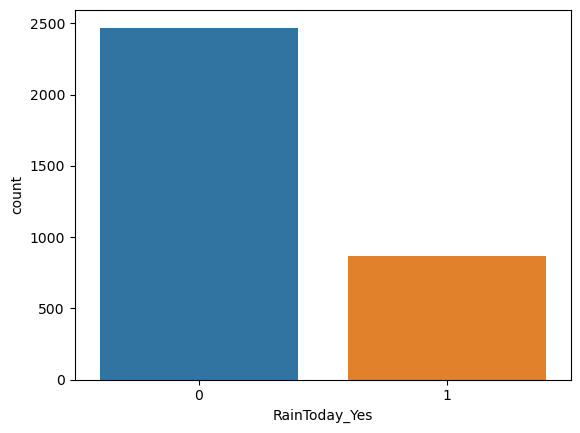

In [14]:
sns.countplot(data =df, x = "RainToday_Yes")

<Axes: xlabel='RainTomorrow_Yes', ylabel='count'>

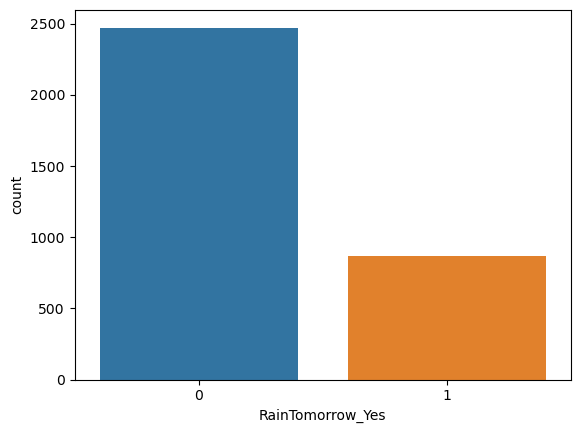

In [15]:
sns.countplot(data =df, x = "RainTomorrow_Yes")

C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


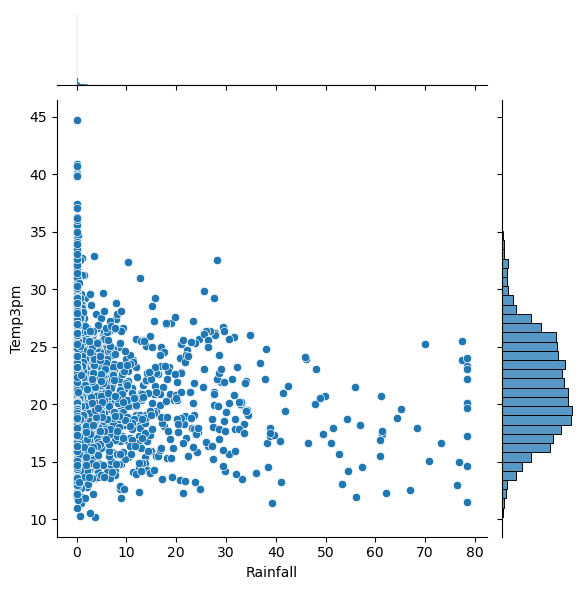

In [16]:
sns.jointplot(x= "Rainfall", y="Temp3pm",data=df)

C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


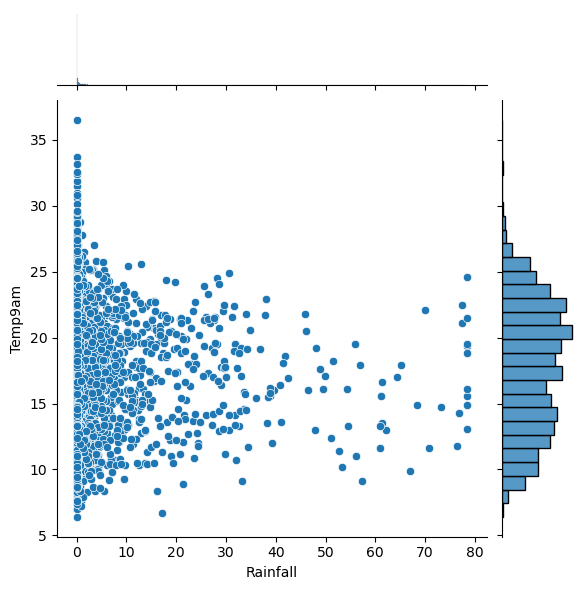

In [17]:
sns.jointplot(x= "Rainfall", y="Temp9am",data=df)

C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

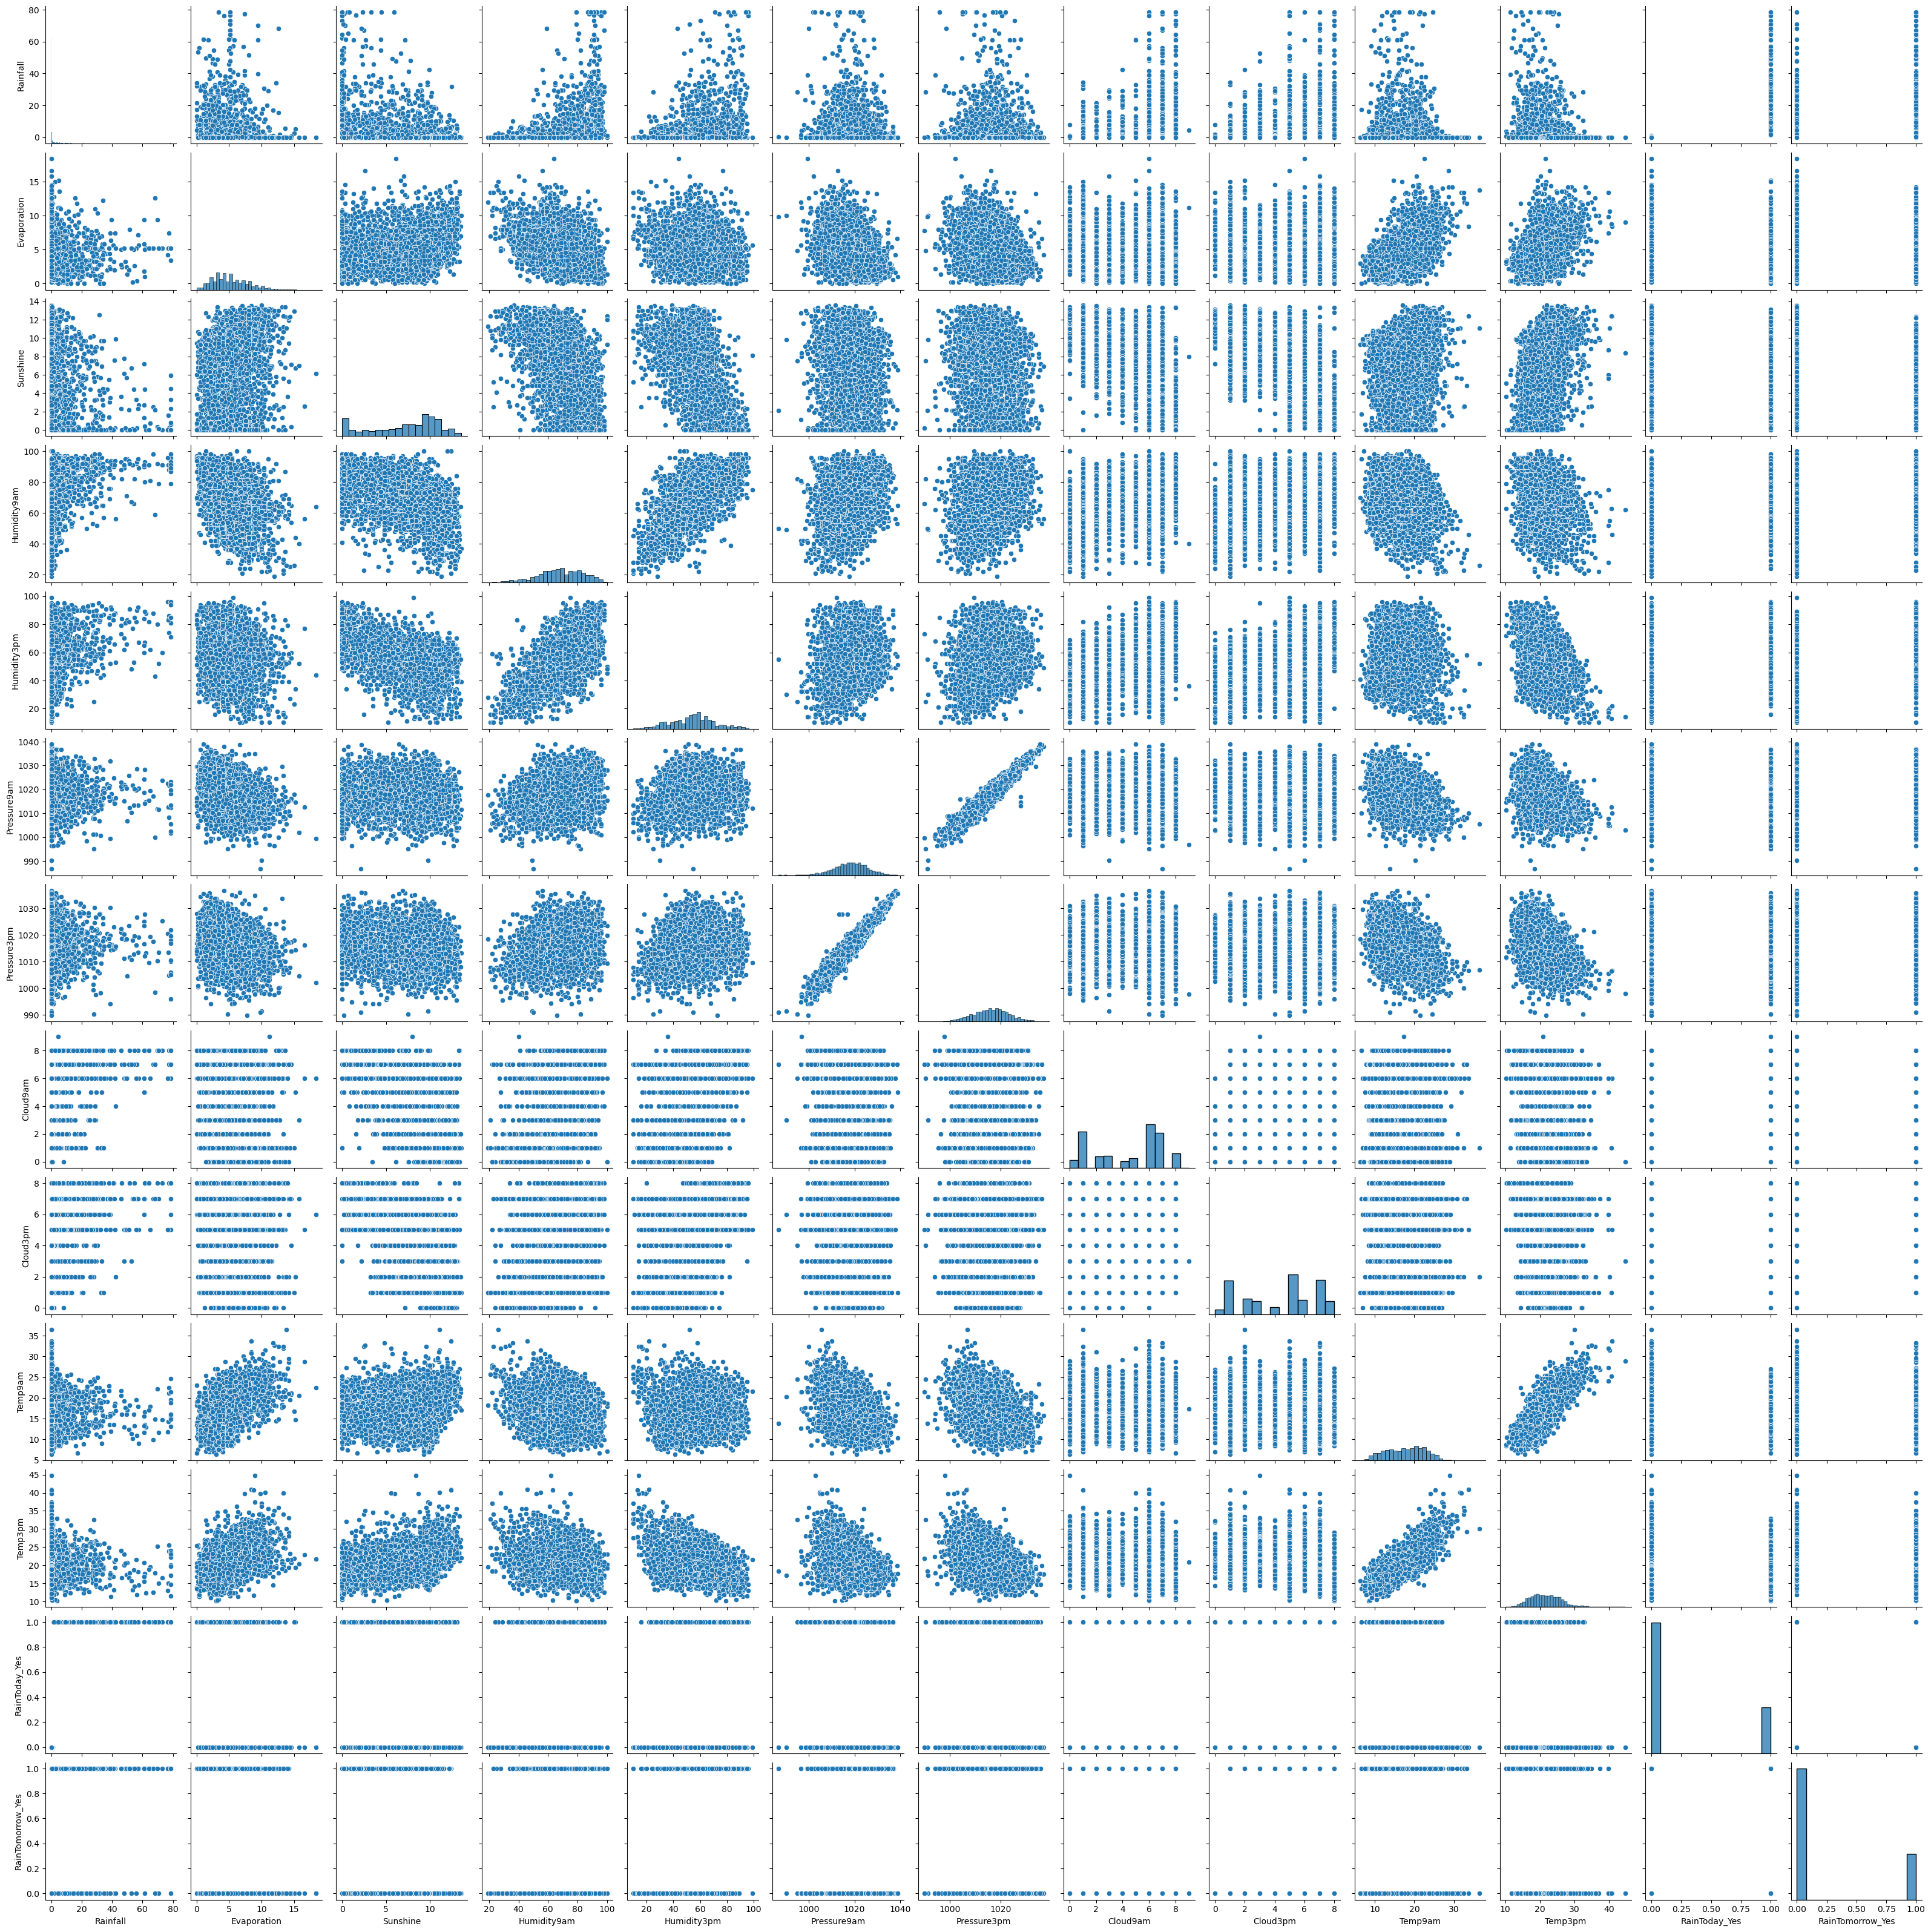

In [18]:
sns.pairplot(df)

# Logistic Regression

In [19]:
import statsmodels.api as sm

In [20]:
#defining x and y
x_multi=df.drop("RainTomorrow_Yes",axis = 1)
y_multi=df.RainTomorrow_Yes

In [21]:
#adding constant to independent variable
x_cons =sm.add_constant(x_multi)

In [22]:
logit = sm.Logit(y_multi,x_cons).fit()

Optimization terminated successfully.
         Current function value: 0.386331
         Iterations 7


In [23]:
#Detailed summary of result of logistic regression
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3324
Method:                           MLE   Df Model:                           12
Date:                Sun, 12 May 2024   Pseudo R-squ.:                  0.3249
Time:                        11:22:54   Log-Likelihood:                -1289.2
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                2.949e-258
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.6148      8.238      3.838      0.000      15.469      47.761
Rainfall          0.0139      0.007      2.076      0.038       0.001       0.027
Evaporation       0.0295      0.024      1.210      0.226      -0.018       0.077
Sunshine         -0.1916      0.022     -8.735      0.000      -0.235      -0.149
Humidity9am       0.0013      0.006      0.216      0.829      -0.011       0.014
Humidity3pm       0.0489      0.007      7.388      0.000       0.036       0.062
Pressure9am      -0.0812      0.029     -2.764      0.006      -0.139      -0.024
Pressure3pm       0.0472      0.028      1.659      0.097      -0.009       0.103
Cloud9am         -0.1072      0.029     -3.671      0.000      -0.165      -0.050
Cloud3pm          0.1722      0.032      5.404      0.000       0.110       0.235
Temp9am          -0.0311      0.034     -0.916      0.360      -0.098       0.035
Temp3pm           0.0064      0.037      0.176      0.860      -0.065       0.078
RainToday_Yes     0.6669      0.136      4.908      0.000       0.401       0.933
=================================================================================
"""

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_multi=df.drop("RainTomorrow_Yes",axis = 1)
y_multi=df.RainTomorrow_Yes

In [27]:
#doing test train split
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state= 0)

In [28]:
print (x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(2669, 12) (668, 12) (2669,) (668,)


In [29]:
#doing logistic regression by linear model 
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)

C:\Users\hp\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#preparing data for checking score
y_train_a = clf_lr.predict(x_train)
y_test_a = clf_lr.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score , confusion_matrix


In [32]:
confusion_matrix(y_train, y_train_a)

array([[1815,  147],
       [ 313,  394]], dtype=int64)

In [33]:
accuracy_score(y_train,y_train_a)

0.827650805545148

In [34]:
confusion_matrix(y_test, y_test_a)

array([[472,  38],
       [ 75,  83]], dtype=int64)

In [35]:
#accuracy score of Logistic regression
accuracy_score(y_test,y_test_a)

0.8308383233532934

# Linear Discriminant Analysis

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
clf_lda=LinearDiscriminantAnalysis()

In [38]:
#fittign lda analysis on training sets
clf_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [39]:
y_train_a = clf_lda.predict(x_train)
y_test_a = clf_lda.predict(x_test)

In [40]:
confusion_matrix(y_train, y_train_a)

array([[1793,  169],
       [ 295,  412]], dtype=int64)

In [41]:
accuracy_score(y_train, y_train_a)

0.8261521168977145

In [42]:
confusion_matrix(y_test, y_test_a)

array([[467,  43],
       [ 68,  90]], dtype=int64)

In [43]:
accuracy_score(y_test, y_test_a)

0.8338323353293413

# K Nearest Neighbour 

In [44]:
from sklearn import preprocessing

In [45]:
#standardising data for KNN
scaler=preprocessing.StandardScaler().fit(x_train)
x_train_s=scaler.transform(x_train)


In [46]:
#standardising data for knn
scaler=preprocessing.StandardScaler().fit(x_test)
x_test_s=scaler.transform(x_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
clf_knn=KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

In [49]:
y_train_a = clf_knn.predict(x_train_s)
y_test_a = clf_knn.predict(x_test_s)

In [50]:
confusion_matrix(y_train, y_train_a)

array([[1962,    0],
       [   0,  707]], dtype=int64)

In [51]:
accuracy_score(y_train, y_train_a)

1.0

In [52]:
confusion_matrix(y_test, y_test_a)

array([[410, 100],
       [ 84,  74]], dtype=int64)

In [53]:
accuracy_score(y_test, y_test_a)

0.7245508982035929

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
#setting different n_neighbors for knn
params={'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

In [56]:
#choosing best no. of neighbor for knn
Grid_search =GridSearchCV(KNeighborsClassifier(), params)

In [57]:
Grid_search.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [58]:
Grid_search.best_params_

{'n_neighbors': 6}

In [59]:
#optimising the model with best parameter 
Optimised_knn=Grid_search.best_estimator_

In [60]:
y_test_a=Optimised_knn.predict(x_test_s)

In [61]:
confusion_matrix(y_test, y_test_a)

array([[480,  30],
       [ 92,  66]], dtype=int64)

In [62]:
accuracy_score(y_test, y_test_a)

0.8173652694610778

# Decision Tree

In [63]:
#defining and fiiting decision regrssion tree
from sklearn import tree
clf_tree=tree.DecisionTreeClassifier(max_depth=3)

In [64]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
y_train_a=clf_tree.predict(x_train)
y_test_a=clf_tree.predict(x_test)

In [66]:
(y_train, y_train_a)

(245     1
 2258    0
 242     0
 2747    1
 2982    1
        ..
 835     0
 3264    0
 1653    1
 2607    0
 2732    0
 Name: RainTomorrow_Yes, Length: 2669, dtype: int32,
 array([0, 0, 0, ..., 1, 0, 0]))

In [67]:
from IPython.display import Image
import pydotplus

In [68]:
#generates a Graphviz representation of a decision tree model
dot_data =tree.export_graphviz(clf_tree, out_file= None)

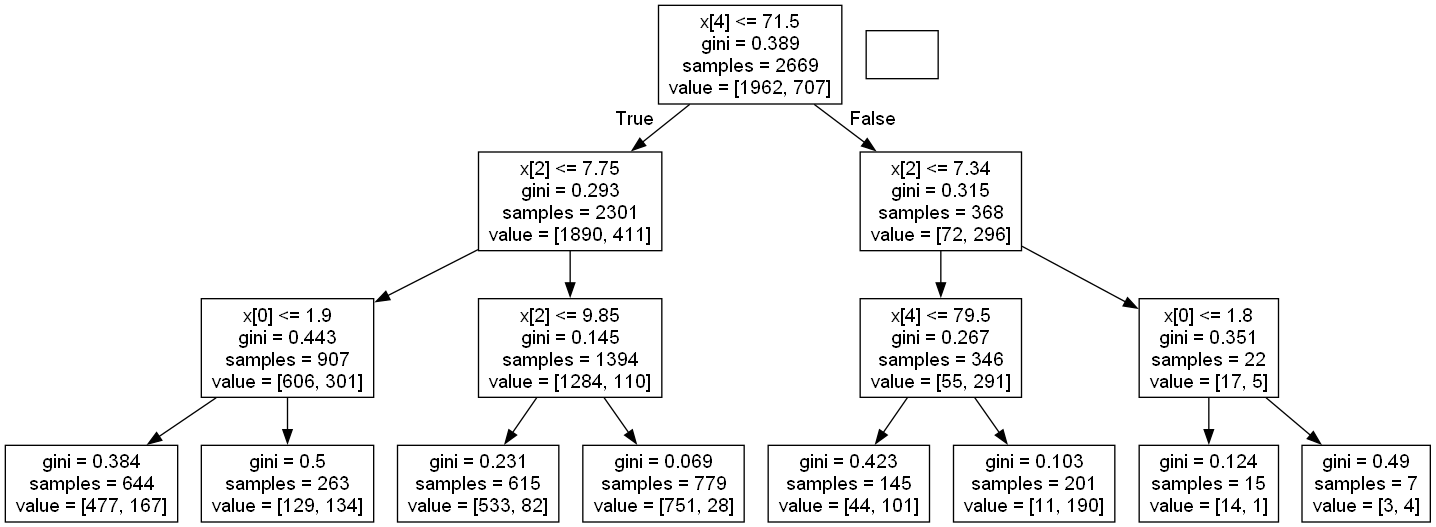

In [69]:
#making image of decision tree
graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [70]:
confusion_matrix(y_train, y_train_a)

array([[1775,  187],
       [ 278,  429]], dtype=int64)

In [71]:
accuracy_score(y_train, y_train_a)

0.8257774447358561

In [72]:
confusion_matrix(y_test, y_test_a)

array([[453,  57],
       [ 74,  84]], dtype=int64)

In [73]:
accuracy_score(y_test, y_test_a)

0.8038922155688623

# Random Forest

In [74]:
from  sklearn.ensemble import RandomForestClassifier

In [75]:
rf_clf = tree.DecisionTreeClassifier(max_depth =4)

In [76]:
#staring a random forest generator
rf_clf = RandomForestClassifier(n_estimators =1000, n_jobs=-1, random_state= 42)

In [77]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [78]:
y_test_a= rf_clf.predict(x_test)
y_train_a=rf_clf.predict(x_train)

In [79]:
confusion_matrix(y_train, y_train_a)

array([[1962,    0],
       [   0,  707]], dtype=int64)

In [80]:
accuracy_score(y_train, y_train_a)

1.0

In [81]:
confusion_matrix(y_test, y_test_a)

array([[482,  28],
       [ 79,  79]], dtype=int64)

In [82]:
accuracy_score(y_test, y_test_a)

0.8398203592814372

# Boost

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
#defining And fitting Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(learning_rate =0.2, n_estimators =1000, max_depth=1)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, n_estimators=1000)

In [85]:
y_test_a= gb_clf.predict(x_test)
y_train_a=gb_clf.predict(x_train)

In [86]:
confusion_matrix(y_train, y_train_a)

array([[1876,   86],
       [ 280,  427]], dtype=int64)

In [87]:
accuracy_score(y_train, y_train_a)

0.8628699887598351

In [88]:
confusion_matrix(y_test, y_test_a)

array([[484,  26],
       [ 78,  80]], dtype=int64)

In [89]:
accuracy_score(y_test, y_test_a)

0.844311377245509

# XG Boost

In [90]:
import xgboost as xgb
from sklearn.metrics import make_scorer

In [91]:
#initiatinga XG Boosting
xgb_clf = xgb.XGBClassifier(max_depth =5, n_estimators = 1000, learning_rate = 0.3, n_jobs= -1)

In [92]:
#fitting the data for XG Boost
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
y_test_a= xgb_clf.predict(x_test)
y_train_a=xgb_clf.predict(x_train)

In [94]:
confusion_matrix(y_train, y_train_a)

array([[1962,    0],
       [   0,  707]], dtype=int64)

In [95]:
accuracy_score(y_train, y_train_a)

1.0

In [96]:
confusion_matrix(y_test, y_test_a)

array([[474,  36],
       [ 67,  91]], dtype=int64)

In [97]:
accuracy_score(y_test, y_test_a)

0.8458083832335329

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

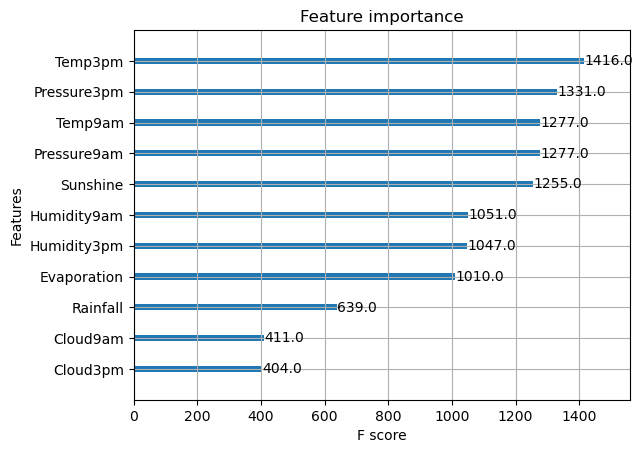

In [98]:
#plotting graph for importance of each variable
xgb.plot_importance(xgb_clf)

In [99]:
scorer = make_scorer(accuracy_score)

In [100]:
#setting parameters for different variable
param_test= {
    'max_depth': (3,5,7,9),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha': [1e-2,0.1,1]
}

In [101]:
#grid search through parameter
grid_search = GridSearchCV( xgb_clf, param_test, n_jobs=-1, cv=5, scoring = scorer, error_score ='raise')

In [102]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=1000,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': (3, 5, 7, 9),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring=make_scorer(accuracy_score))

In [103]:
y_test_a= grid_search.predict(x_test)
y_train_a=grid_search.predict(x_train)

In [104]:
accuracy_score(y_train, y_train_a)

1.0

In [105]:
accuracy_score(y_test, y_test_a)

0.8398203592814372